---
title: "Entropy"
date: "2022-01-09"
tags:
    - cs, stats
---

In [2]:
import math

import matplotlib.pyplot as plt
import numpy as np

## Intro

- Entropy is a measure of the amount of information contained in an event or a random variable. It is a cornerstone of information theory, a subfield of mathematics concerned with the transmission of data across a noisy channel.

## Information of an event

- Key intuition: learning that a low probability event has occurred is more informative than learning that a high probability event has occurred. Hence, the information of an event $E$ is inversely proportional to its probability $p(E)$.

- We could capture this using $I(E) = \frac{1}{p(E)}$. But this implied that when $E$ is certain to occur (and thus $p(E) = 1$), the information would be 1, when it would make more sense for it to be 0.

- A way to achieve this is to use $log\left(\frac{1}{p(E)}\right)$ (the log is actually the only function that also satisfies a number of other desirable characteristics).

- Hence, the information (or surprise) of E, often called *Shannon information*, *self-information*, or just *information*, is defined as

$$I(E) = log\left(\frac{1}{p(E)}\right) = -log(p(E)).$$

- As a reminder to myself: the second equality holds because $log(\frac{1}{p(E)}) = log(p(E)^{-1}) = -log(p(E))$, where the second step is true because (using base $e$ for simplicity of notation) $e^{ln(a^b)} = a^b = (e^{ln(a)})^b = e^{bln(a)}$, where the last step is true because $(e^a)^b = e^{ab}$, and which implies that $ln(a^b) = bln(a)$.

- The choice of the base for the logarithm varies by application and determines the units of $I(E)$. Base 2 means that information is expressed in bits. The natural logarithm, another popular choice, expresses information in *nats*.

### Tossing a head example

In [3]:
p = 0.5
I = -math.log2(p)
print(
    f"If p(head) is {p:.2f}, the amount of information of flipping a head is {I:.2f} bit."
)

If p(head) is 0.50, the amount of information of flipping a head is 1.00 bit.


Getting head when it is unlikely is more informative.

In [4]:
p = 0.1
I = -math.log2(p)
print(
    f"If p(head) is {p:.2f}, the information conveyed by flipping a head is {I:.2f} bit."
)

If p(head) is 0.10, the information conveyed by flipping a head is 3.32 bit.


### Rolling a *6* example

In [5]:
p = 1 / 6
I = -math.log2(p)
print(f"Rolling a 6 with a fair die has {I:.2f} bits of information.")

Rolling a 6 with a fair die has 2.58 bits of information.


### Probability vs information

Generally, the higher the probability of an event $E$, the lower the information content revealed when it comes to pass.

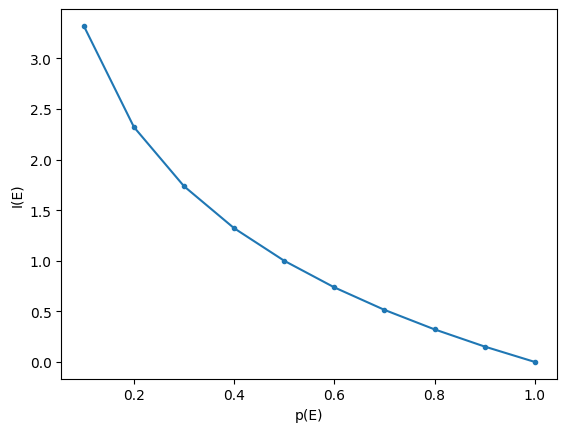

In [6]:
probs = np.linspace(0.1, 1, 10)
info = [-math.log2(p) for p in probs]

fig, ax = plt.subplots()
ax.plot(probs, info, marker=".")
ax.set(xlabel="p(E)", ylabel="I(E)");

## Information of a random variable

- The information of a random variable *X* is called *Information entropy*, *Shannon entropy*, or just *entropy*, and denoted by $H(X)$ (named, by Shannon, after Boltzmann's H-theorem in statistical mechanics).

- Calculating the information of a random variable is the same as calculating the information of the probability distribution of the events for the random variables. It is calculated as 

$$H(X) = -\sum_x p(x) \times log(p(x)) = \sum_x p(x)I(x) = \mathbb{E} I(x).$$

- Intuitively, the entropy of a random variable captures the expected amount of information conveyed by an event drawn from the probability distribution of the random variable. Hence, it's the expected value of self-information of a variable, which can be seen by the last equality above.

- Why does entropy (when calculated using base 2 logarithms) also represent the number of bits required to convey the average outcome of a distribution? [Wikipedia](https://en.wikipedia.org/wiki/Entropy_&28information_theory%29#Introduction) (in the second to last paragraph of the introduction) explains this well. Basically, its because if there are some events with very high probability, then these events could be transmitted with short codes of only a few bits, so that most of the time, only a few bits have to be transmitted to send the message.

### Fair die example

Given that all six sides of a fair die have equal probability of being thrown, and given that the entropy for a random variable captures the average amount of information of its events, we'd expect the entropy of throwing a fair die to be identical to the amount of information of throwing a *6*, as calculated above. The below shows that this is indeed the case.

In [7]:
probs = [1 / 6] * 6
H = -sum(p * math.log2(p) for p in probs)
print(f"Entropy of rolling a fair die is {H:.2f}.")

Entropy of rolling a fair die is 2.58.


We can also use the `entropy()` function from `scipy`.

In [9]:
from scipy.stats import entropy

H1 = entropy(probs, base=2)
assert H == H1

### Skewness vs information

The below shows the [binary entropy function](https://en.wikipedia.org/wiki/Binary_entropy_function), the relationship between entropy and the binary outcome probability in a Bernoulli process.

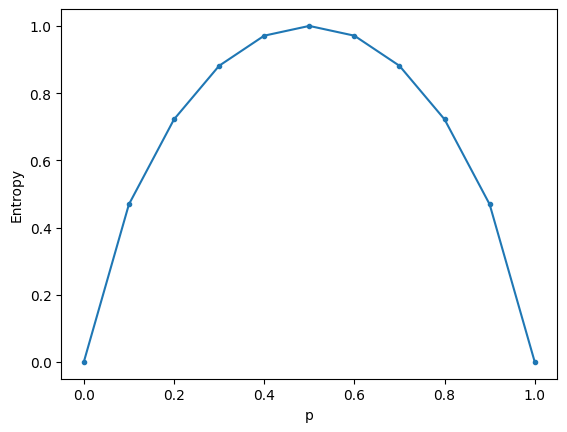

In [10]:
probs = np.linspace(0, 1, 11)
H = [entropy([p, 1 - p], base=2) for p in probs]

fig, ax = plt.subplots()
ax.plot(probs, H, marker=".")
ax.set(xlabel="p", ylabel="Entropy");

## References

- [Claude E. Shannon, A mathematical theory of communication](http://www.all.net/refs/shannon1948.pdf)
- [Wikipedia, Entropy](https://en.wikipedia.org/wiki/Entropy_%28information_theory%29)
- [Machine Learning Mastery, A gentle introduction to information entropy](https://machinelearningmastery.com/what-is-information-entropy/)
- [Aerin Kim, The intuition behind Shannon's entropy](https://towardsdatascience.com/the-intuition-behind-shannons-entropy-e74820fe9800)